# Alpha Vantage API

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
key = '8T87D2KT1SOI8DBO'
from alpha_vantage.sectorperformance import SectorPerformances

In [3]:
sp = SectorPerformances(key, output_format='pandas')
data, meta_data = sp.get_sector()

In [4]:
meta_data

{'Information': 'US Sector Performance (realtime & historical)',
 'Last Refreshed': '2022-01-03 21:11:22 US/Eastern'}

In [5]:
data.head()

,Rank A: Real-Time Performance,Rank B: Day Performance,Rank C: Day Performance,Rank D: Month Performance,Rank E: Month Performance,Rank F: Year-to-Date (YTD) Performance,Rank G: Year Performance,Rank H: Year Performance,Rank I: Year Performance,Rank J: Year Performance
Energy,0.0310,0.0025,0.0104,0.0293,0.0678,0.4774,0.4654,0.0014,-0.2376,-0.1883
Consumer Discretionary,0.0276,-0.0029,0.0042,-0.0031,0.1266,0.2366,0.2364,1.0836,1.4864,NaN
Financials,0.0124,-0.0013,0.0055,0.0312,0.0407,0.3254,0.3430,0.6580,0.6817,NaN
Information Technology,0.0102,-0.0049,0.0047,0.0333,0.1645,0.3335,0.3375,1.8342,2.7817,NaN
Communication Services,0.0056,-0.0121,-0.0079,0.0252,-0.0021,0.2053,0.2170,0.9328,0.5145,NaN


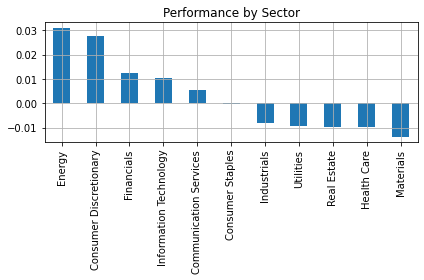

In [6]:
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title("Performance by Sector")
plt.tight_layout()
plt.grid(True)

In [7]:
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries

In [8]:
ta = TechIndicators(key, output_format='pandas')

In [9]:
goog, meta = ta.get_sma('GOOG', interval='daily', time_period=200, series_type='close')

In [10]:
goog.head()

,SMA
date,
2015-01-09,552.7623
2015-01-12,552.4327
2015-01-13,552.1137
2015-01-14,551.8332
2015-01-15,551.5063


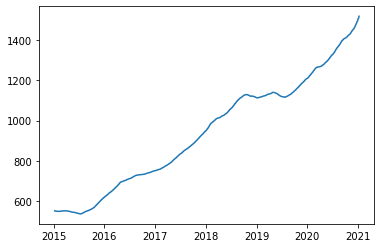

In [67]:
plt.plot(goog)

In [11]:
ts = TimeSeries(key, output_format='pandas')

In [12]:
prices,meta = ts.get_daily('GOOG', outputsize='full')

In [13]:
prices.columns = ['open','high','low','close','volume']
prices.sort_index(inplace=True)
prices.head()

,open,high,low,close,volume
date,,,,,
2014-03-27,568.000,568.00,552.92,558.46,13100.0
2014-03-28,561.200,566.43,558.67,559.99,41100.0
2014-03-31,566.890,567.00,556.93,556.97,10800.0
2014-04-01,558.710,568.45,558.71,567.16,7900.0
2014-04-02,565.106,604.83,562.19,567.00,146700.0


In [14]:
prices = prices.loc['2015-01-09':]

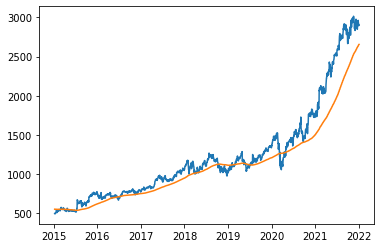

In [15]:
plt.plot(prices['close'])
plt.plot(goog)

#### https://www.alphavantage.co/documentation/

In [16]:
import requests
import json

In [17]:
symbol = 'GOOG'

call = requests.get(f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={symbol}&apikey={key}').text

In [18]:
call = json.loads(call)
call = pd.DataFrame.from_dict(call, orient='index')

In [19]:
call.loc['Symbol']

0    GOOG
Name: Symbol, dtype: object

#### Other API function calls: BALANCE_SHEET INCOME_STATEMENT  CASH_FLOW EARNINGS

In [20]:
symbol = 'GOOG'
function = 'EARNINGS'
call = requests.get(f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={key}").text

In [21]:
call = json.loads(call)
call

{'symbol': 'GOOG',
 'annualEarnings': [{'fiscalDateEnding': '2021-09-30', 'reportedEPS': '81.54'},
  {'fiscalDateEnding': '2020-12-31', 'reportedEPS': '58.7'},
  {'fiscalDateEnding': '2019-12-31', 'reportedEPS': '52.38'},
  {'fiscalDateEnding': '2018-12-31', 'reportedEPS': '47.0794'},
  {'fiscalDateEnding': '2017-12-31', 'reportedEPS': '38.176'},
  {'fiscalDateEnding': '2016-12-31', 'reportedEPS': '34.34'},
  {'fiscalDateEnding': '2015-12-31', 'reportedEPS': '29.58'},
  {'fiscalDateEnding': '2014-12-31', 'reportedEPS': '28.2406'}],
 'quarterlyEarnings': [{'fiscalDateEnding': '2021-09-30',
   'reportedDate': '2021-10-26',
   'reportedEPS': '27.99',
   'estimatedEPS': '23.2403',
   'surprise': '4.7497',
   'surprisePercentage': '20.4373'},
  {'fiscalDateEnding': '2021-06-30',
   'reportedDate': '2021-07-27',
   'reportedEPS': '27.26',
   'estimatedEPS': '19.1032',
   'surprise': '8.1568',
   'surprisePercentage': '42.6986'},
  {'fiscalDateEnding': '2021-03-31',
   'reportedDate': '2021-0

In [22]:
pd.DataFrame(call['quarterlyEarnings'])

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2021-09-30,2021-10-26,27.99,23.2403,4.7497,20.4373
1,2021-06-30,2021-07-27,27.26,19.1032,8.1568,42.6986
2,2021-03-31,2021-04-27,26.29,15.6602,10.6298,67.8778
3,2020-12-31,2021-02-02,22.3,16.0105,6.2895,39.2836
4,2020-09-30,2020-10-29,16.4,11.1964,5.2036,46.4757
5,2020-06-30,2020-07-30,10.13,8.2091,1.9209,23.3996
6,2020-03-31,2020-04-28,9.87,10.762,-0.892,-8.2884
7,2019-12-31,2020-02-03,15.35,12.5938,2.7562,21.8854
8,2019-09-30,2019-10-28,10.92,12.709,-1.789,-14.0766
9,2019-06-30,2019-07-25,14.21,11.471,2.739,23.8776
